In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [26]:
training_set = pd.read_csv('D:\Documents\Desktop\Code\CD\data3.csv')

In [27]:
training_set = training_set.iloc[:,1:2].values

In [28]:
print(training_set)

[[449.38]
 [448.37]
 [452.13]
 ...
 [812.47]
 [814.69]
 [822.01]]


In [29]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)

In [31]:
X_train = training_set[0:2136]
y_train = training_set[1:2137]

In [32]:
X_train = np.reshape(X_train, (2136, 1, 1))

In [33]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [34]:
regressor = Sequential()
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
67/67 [==============================] - 0s 815us/step - loss: 0.8016
Epoch 2/200
67/67 [==============================] - 0s 796us/step - loss: 0.5457
Epoch 3/200
67/67 [==============================] - 0s 746us/step - loss: 0.3663
Epoch 4/200
67/67 [==============================] - 0s 657us/step - loss: 0.2435
Epoch 5/200
67/67 [==============================] - 0s 716us/step - loss: 0.1618
Epoch 6/200
67/67 [==============================] - 0s 657us/step - loss: 0.1096
Epoch 7/200
67/67 [==============================] - 0s 716us/step - loss: 0.0778
Epoch 8/200
67/67 [==============================] - 0s 731us/step - loss: 0.0595
Epoch 9/200
67/67 [==============================] - 0s 687us/step - loss: 0.0494
Epoch 10/200
67/67 [==============================] - 0s 657us/step - loss: 0.0442
Epoch 11/200
67/67 [==============================] - 0s 687us/step - loss: 0.0414
Epoch 12/200
67/67 [==============================] - 0s 672us/step - loss: 0.0399
Epoch 13/200


67/67 [==============================] - 0s 642us/step - loss: 2.8598e-04
Epoch 99/200
67/67 [==============================] - 0s 672us/step - loss: 2.8323e-04
Epoch 100/200
67/67 [==============================] - 0s 642us/step - loss: 2.7943e-04
Epoch 101/200
67/67 [==============================] - 0s 627us/step - loss: 2.7636e-04
Epoch 102/200
67/67 [==============================] - 0s 657us/step - loss: 2.7294e-04
Epoch 103/200
67/67 [==============================] - 0s 672us/step - loss: 2.6993e-04
Epoch 104/200
67/67 [==============================] - 0s 627us/step - loss: 2.6635e-04
Epoch 105/200
67/67 [==============================] - 0s 612us/step - loss: 2.6323e-04
Epoch 106/200
67/67 [==============================] - 0s 687us/step - loss: 2.5939e-04
Epoch 107/200
67/67 [==============================] - 0s 612us/step - loss: 2.5791e-04
Epoch 108/200
67/67 [==============================] - 0s 612us/step - loss: 2.5493e-04
Epoch 109/200
67/67 [==========================

67/67 [==============================] - 0s 657us/step - loss: 1.4676e-04
Epoch 192/200
67/67 [==============================] - 0s 657us/step - loss: 1.4792e-04
Epoch 193/200
67/67 [==============================] - 0s 612us/step - loss: 1.4812e-04
Epoch 194/200
67/67 [==============================] - 0s 627us/step - loss: 1.4699e-04
Epoch 195/200
67/67 [==============================] - 0s 612us/step - loss: 1.5040e-04
Epoch 196/200
67/67 [==============================] - 0s 612us/step - loss: 1.5141e-04
Epoch 197/200
67/67 [==============================] - 0s 612us/step - loss: 1.4734e-04
Epoch 198/200
67/67 [==============================] - 0s 612us/step - loss: 1.4674e-04
Epoch 199/200
67/67 [==============================] - 0s 597us/step - loss: 1.4670e-04
Epoch 200/200
67/67 [==============================] - 0s 627us/step - loss: 1.4794e-04


In [35]:
test_set = pd.read_csv('D:\Documents\Desktop\Code\CD\data4.csv')
real_stock_price = test_set.iloc[:,1:2].values

In [36]:
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (36, 1, 1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

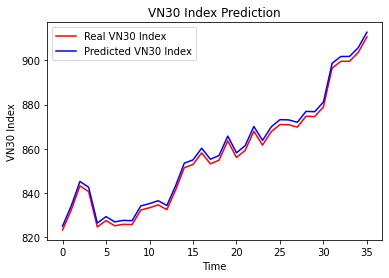

In [37]:
plt.plot(real_stock_price, color = 'red', label = 'Real VN30 Index')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted VN30 Index')
plt.title('VN30 Index Prediction')
plt.xlabel('Time')
plt.ylabel('VN30 Index')
plt.legend()
plt.show()

In [38]:
real_stock_price_train = pd.read_csv('D:\Documents\Desktop\Code\CD\data3.csv')
real_stock_price_train = real_stock_price_train.iloc[:,1:2].values

In [39]:
predicted_stock_price_train = regressor.predict(X_train)
predicted_stock_price_train = sc.inverse_transform(predicted_stock_price_train)

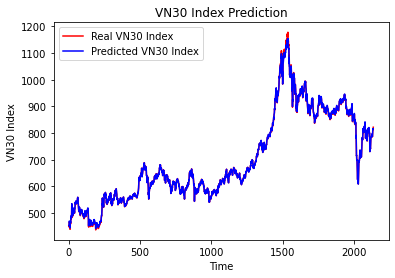

In [40]:
plt.plot(real_stock_price_train, color = 'red', label = 'Real VN30 Index')
plt.plot(predicted_stock_price_train, color = 'blue', label = 'Predicted VN30 Index')
plt.title('VN30 Index Prediction')
plt.xlabel('Time')
plt.ylabel('VN30 Index')
plt.legend()
plt.show()